In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from pmdarima import auto_arima

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


***Du doan cho bo tinh Da Nang***

In [5]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_DaNang_Done.csv')
# df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()
df = df.reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   level_0   1887 non-null   int64         
 1   index     1887 non-null   int64         
 2   date      1887 non-null   datetime64[ns]
 3   pm25      1887 non-null   float64       
 4   pm10      1887 non-null   float64       
 5   o3        1887 non-null   float64       
 6   no2       1887 non-null   float64       
 7   so2       1887 non-null   float64       
 8   co        1887 non-null   float64       
 9   year      1697 non-null   float64       
 10  AQI_pm25  1887 non-null   float64       
 11  AQI_pm10  1887 non-null   float64       
 12  AQI_o3    1887 non-null   float64       
 13  AQI_no2   1887 non-null   float64       
 14  AQI_so2   1887 non-null   float64       
 15  AQI_co    1887 non-null   float64       
 16  AQI       1887 non-null   float64       
dtypes: datetime64[

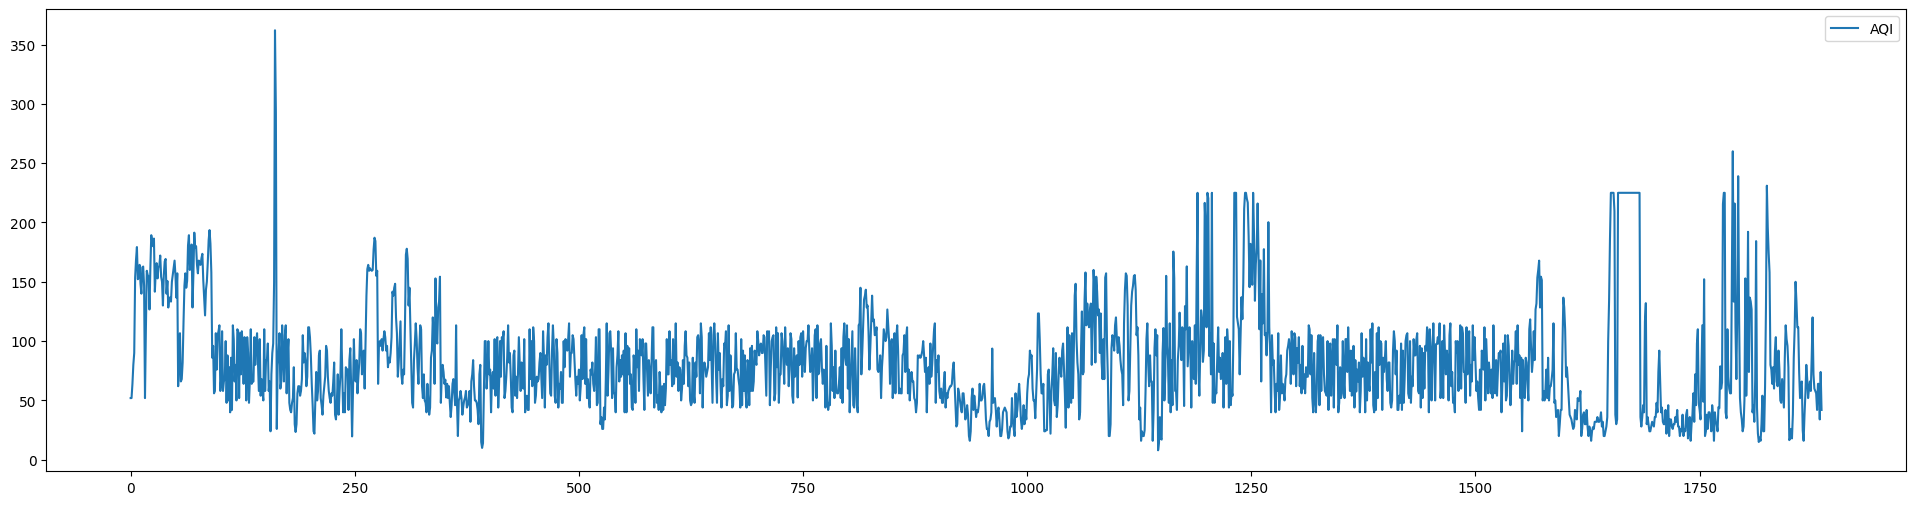

In [6]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

**Chia du lieu thanh 7:2:1**

In [7]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:3
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [8]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12652.093, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12976.864, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12855.668, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12743.749, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12974.864, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12649.675, Time=2.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12665.510, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12648.112, Time=1.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12649.772, Time=1.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12782.169, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12646.160, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12741.749, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12853.668, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12647.827, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

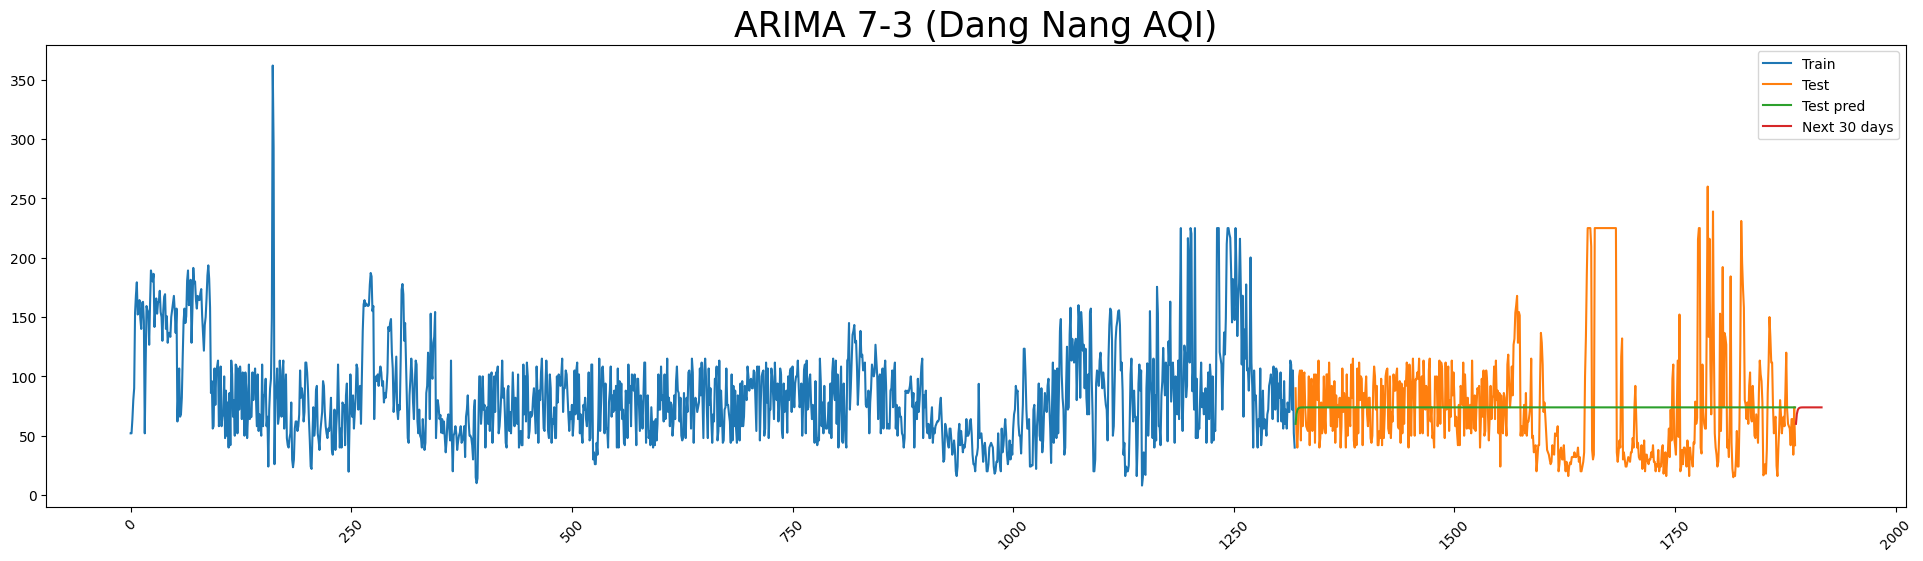

In [11]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Dang Nang AQI)', fontsize=25)
plt.show()

****Chia lai data thanh 8:1:1****

In [13]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8*len(df))

train_data = df[:train_size]
test_data = df[train_size:]


In [14]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14430.804, Time=6.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14853.957, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14676.829, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14523.209, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14851.957, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14431.637, Time=2.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14432.319, Time=1.89 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14434.304, Time=5.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14433.681, Time=4.66 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14432.446, Time=0.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14432.216, Time=2.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14431.877, Time=1.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14436.298, Time=4.68 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14424.014, Time=3.31 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [15]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
# val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

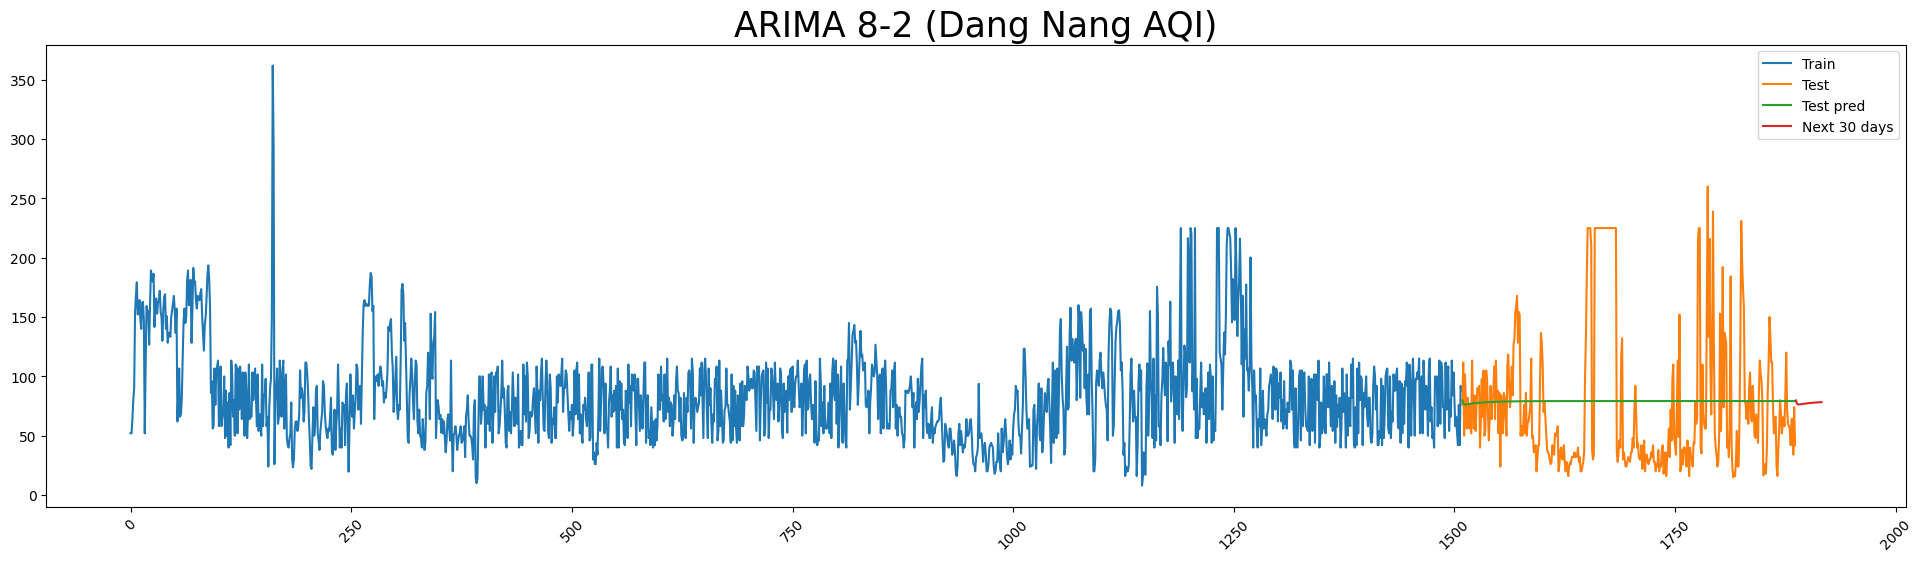

In [16]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
# plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
# plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Dang Nang AQI)', fontsize=25)

plt.show()

**Chia lai du lieu thanh 6:2:2**


In [17]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [18]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16360.336, Time=5.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16728.539, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16559.355, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16448.214, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16726.539, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16358.389, Time=1.99 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16381.113, Time=2.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16358.836, Time=1.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16360.296, Time=2.97 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=16366.343, Time=4.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16358.590, Time=2.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16361.721, Time=3.56 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16356.408, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16379.128, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
# val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

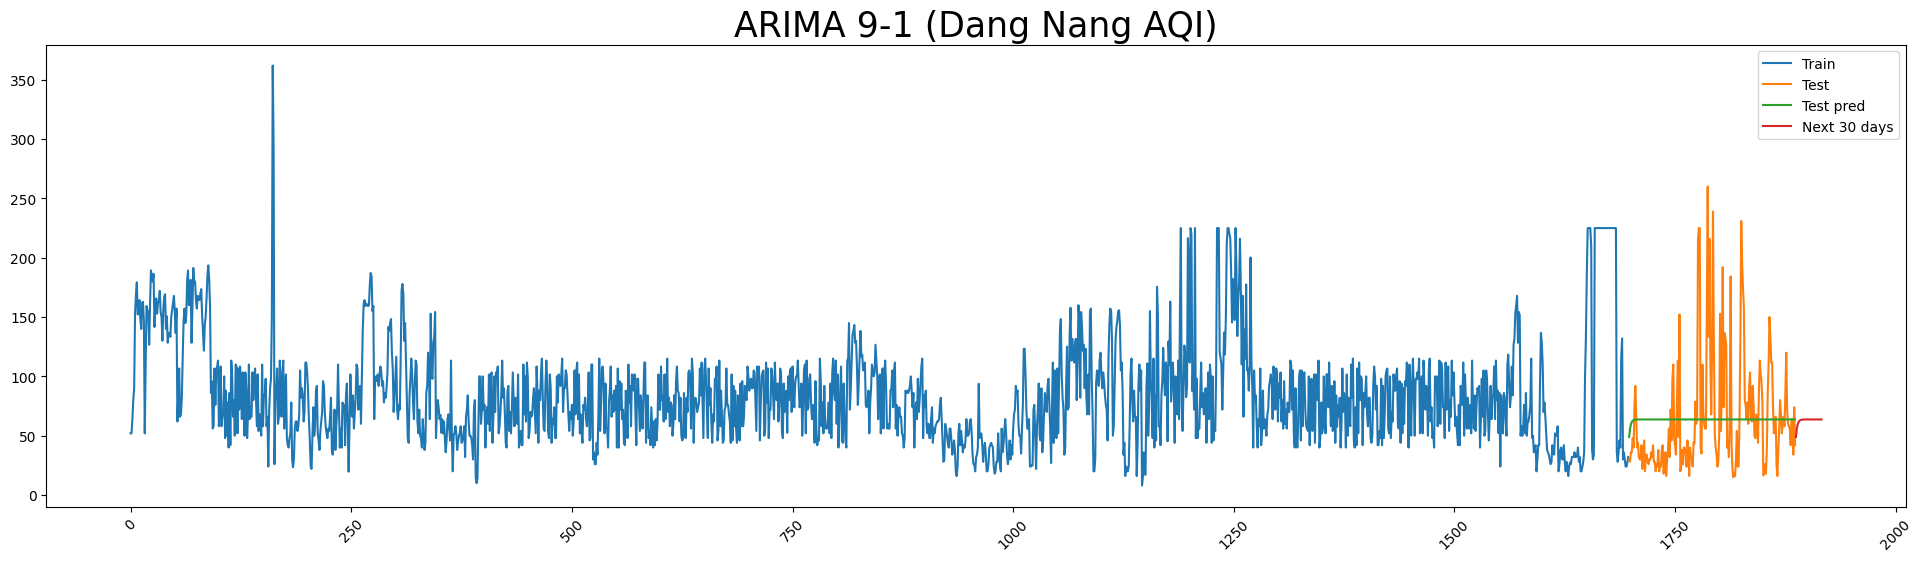

In [20]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
# plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
# plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Dang Nang AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Ha Noi**

In [21]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_HaNoi_Done.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()


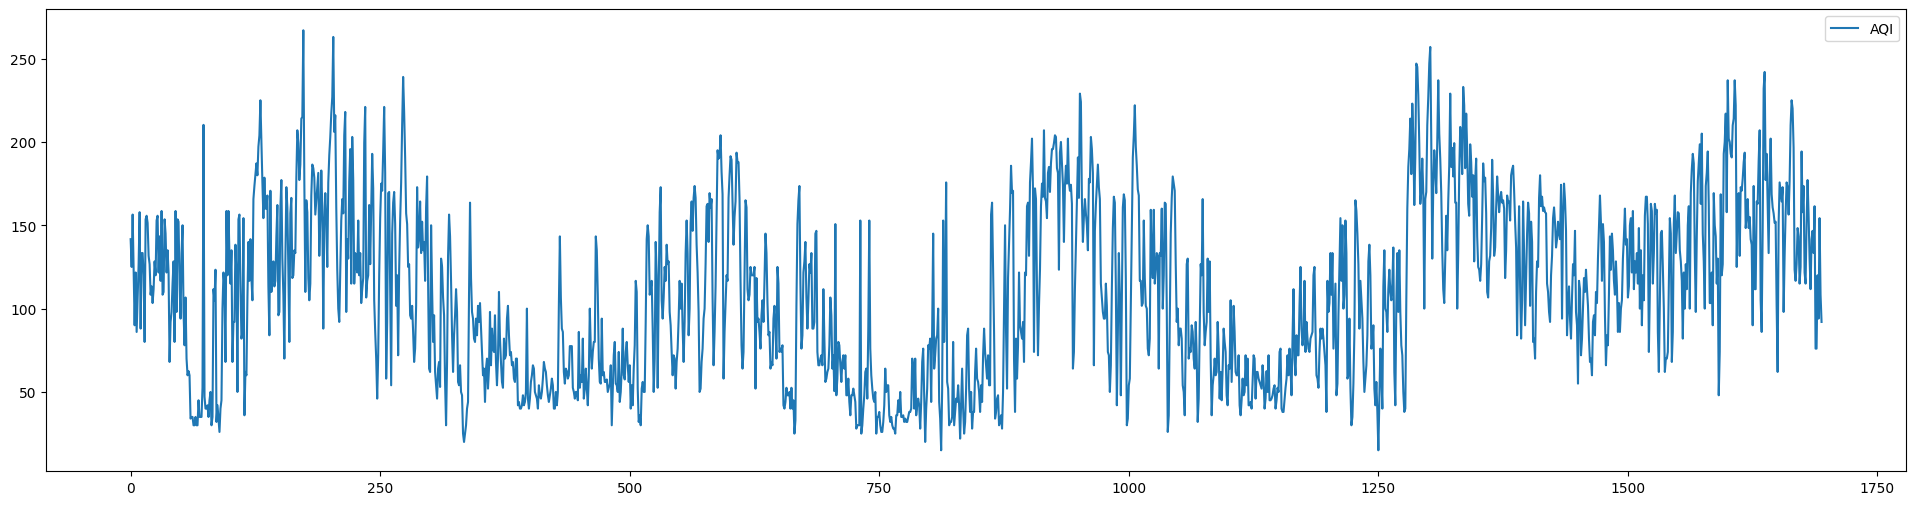

In [22]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu thanh 7:2:1

In [23]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:3
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]



In [24]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11352.265, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11551.597, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11534.478, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11517.844, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11549.597, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11350.273, Time=1.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11398.397, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11359.977, Time=1.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11352.266, Time=2.45 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11359.898, Time=1.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11350.497, Time=2.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11353.110, Time=3.87 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11348.325, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11396.415, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
# val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

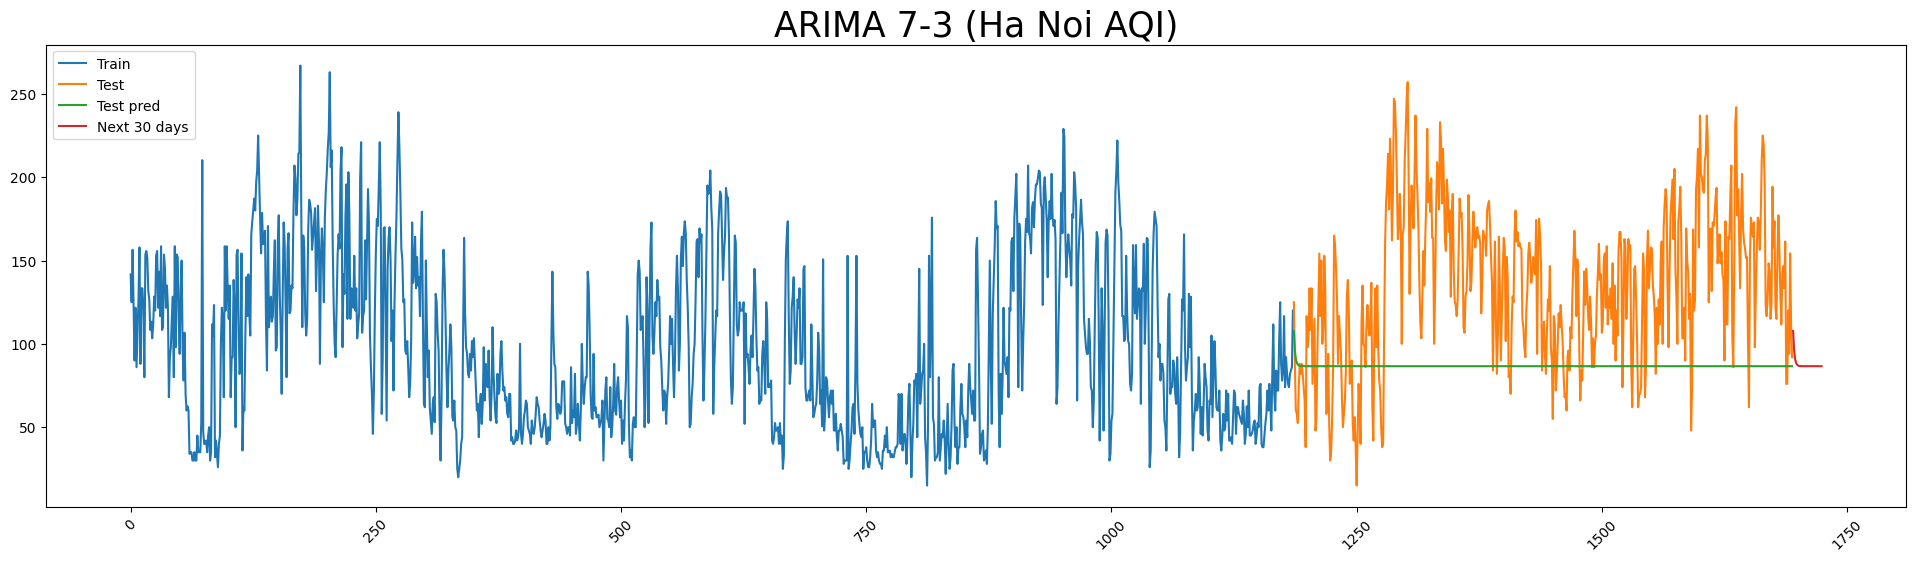

In [26]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
# plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
# plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 8:1:1

In [27]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [28]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12993.940, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13211.322, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13195.308, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13180.019, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13209.324, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12992.033, Time=2.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13051.146, Time=1.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13004.753, Time=1.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12993.965, Time=4.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13006.419, Time=2.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12992.793, Time=1.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12994.494, Time=2.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12990.077, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13049.154, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [29]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
# val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

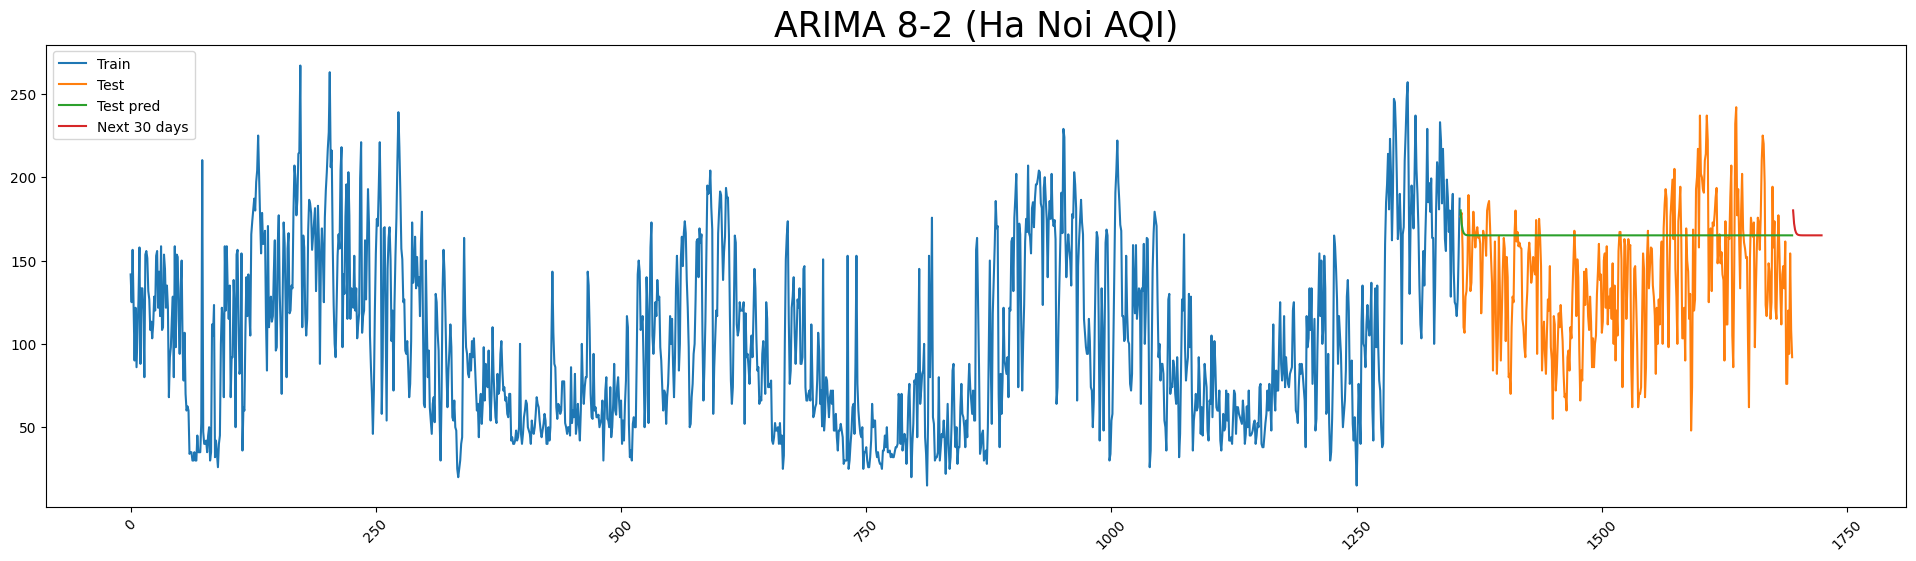

In [30]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
# plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
# plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [31]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))
# test_size = int(0.2 * len(df))
# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:]
# val_data = df[train_size+test_size:]

In [32]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14563.127, Time=5.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14812.777, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14792.795, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14774.236, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14810.777, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14561.145, Time=1.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14628.169, Time=1.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14574.808, Time=1.85 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14563.130, Time=2.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=14575.826, Time=1.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14561.755, Time=1.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14564.281, Time=4.76 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=14559.147, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=14626.170, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
# val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

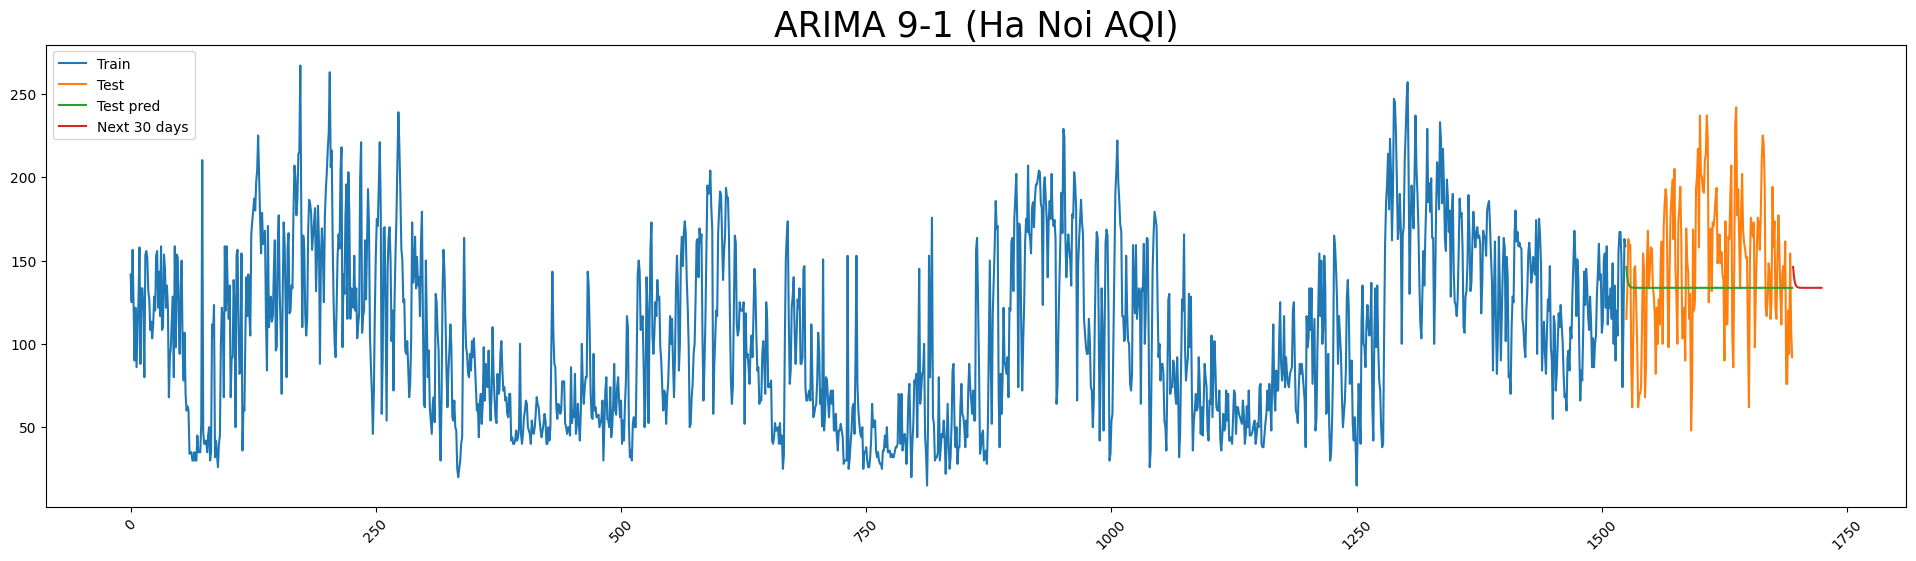

In [34]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
# plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
# plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Ha Noi AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Viet Tri**

In [ ]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_VietTri_Done.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date')
df = df.sort_values(by='date')
df = df.reset_index()


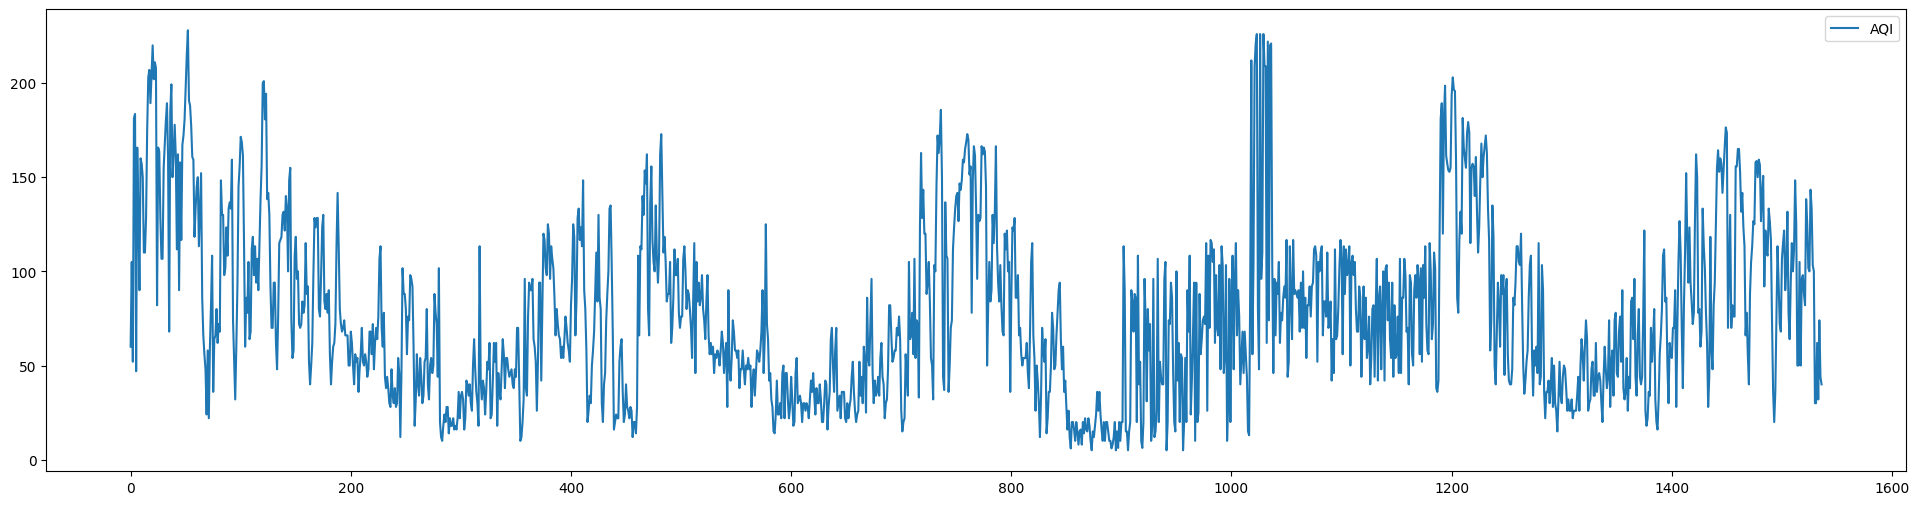

In [ ]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu 7:2:1

In [35]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]



In [36]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11352.265, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11551.597, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11534.478, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11517.844, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11549.597, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11350.273, Time=2.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11398.397, Time=1.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11359.977, Time=2.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11352.266, Time=2.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11359.898, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11350.497, Time=0.87 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11353.110, Time=1.98 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11348.325, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11396.415, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [37]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

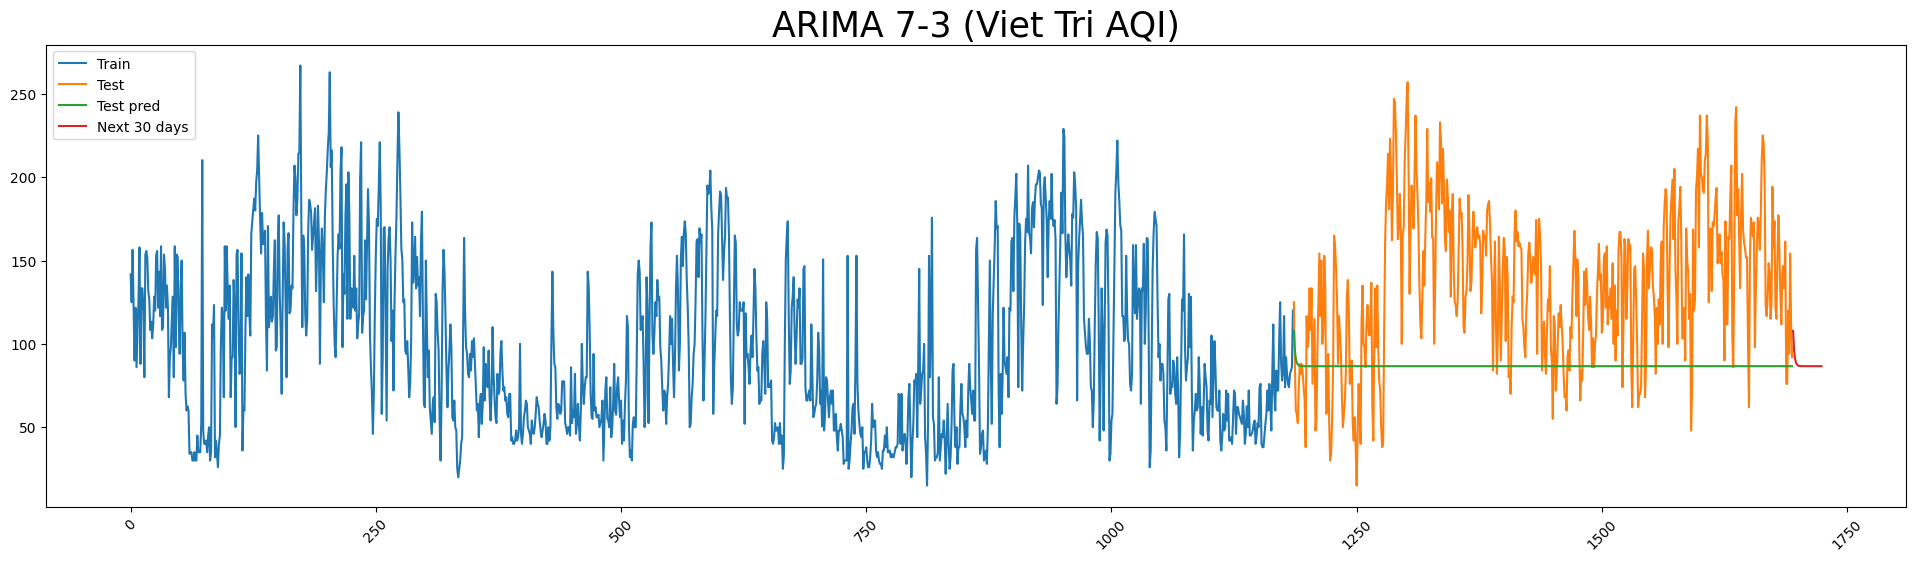

In [39]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)

plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu 8:1:1

In [40]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8 * len(df))



train_data = df[:train_size]
test_data = df[train_size:]



In [41]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12993.940, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13211.322, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13195.308, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13180.019, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13209.324, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12992.033, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13051.146, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13004.753, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12993.965, Time=3.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13006.419, Time=2.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12992.793, Time=2.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12994.494, Time=3.95 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12990.077, Time=1.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13049.154, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [42]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

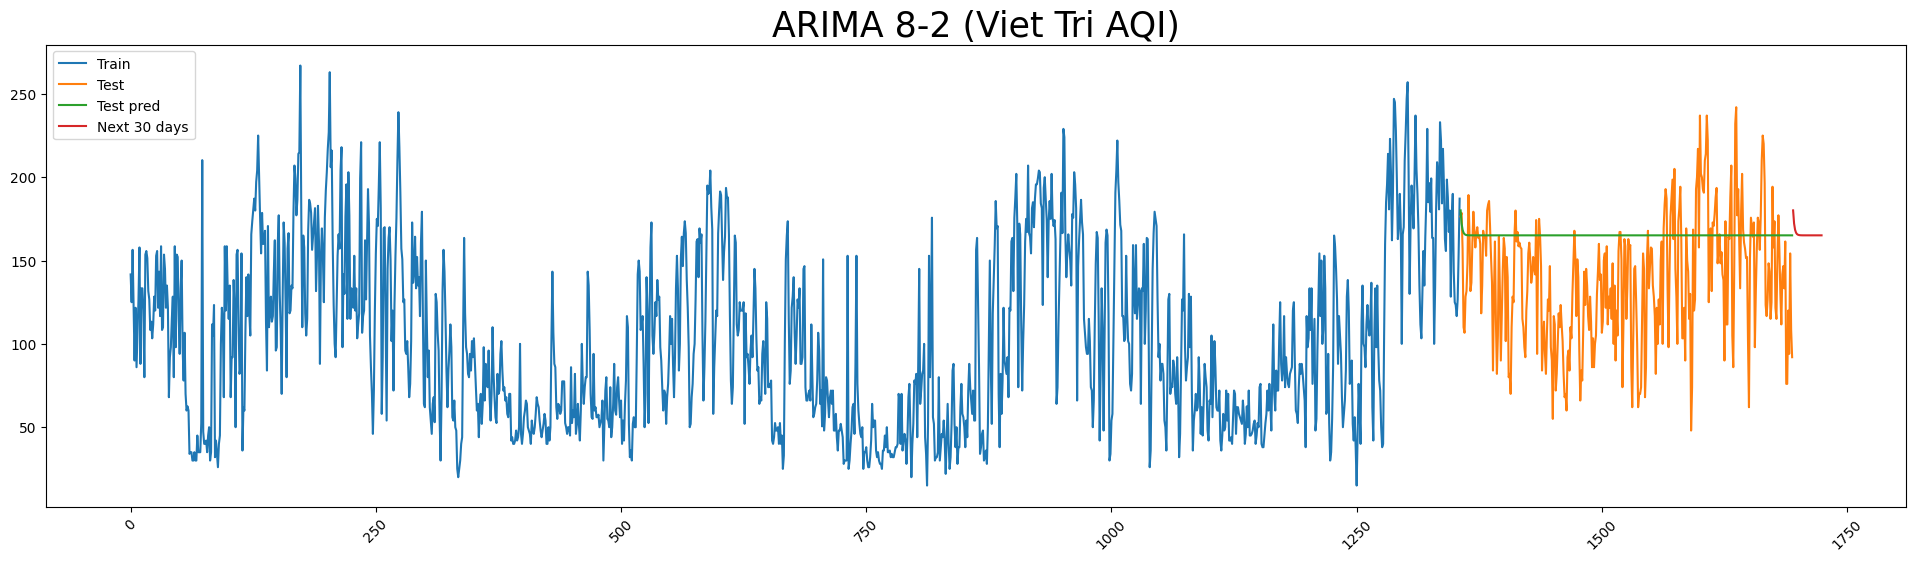

In [43]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test','Test pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [44]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]


In [45]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14563.127, Time=4.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14812.777, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14792.795, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14774.236, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14810.777, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14561.145, Time=1.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14628.169, Time=1.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14574.808, Time=0.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14563.130, Time=1.93 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=14575.826, Time=1.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14561.755, Time=2.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14564.281, Time=4.90 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=14559.147, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=14626.170, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [46]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

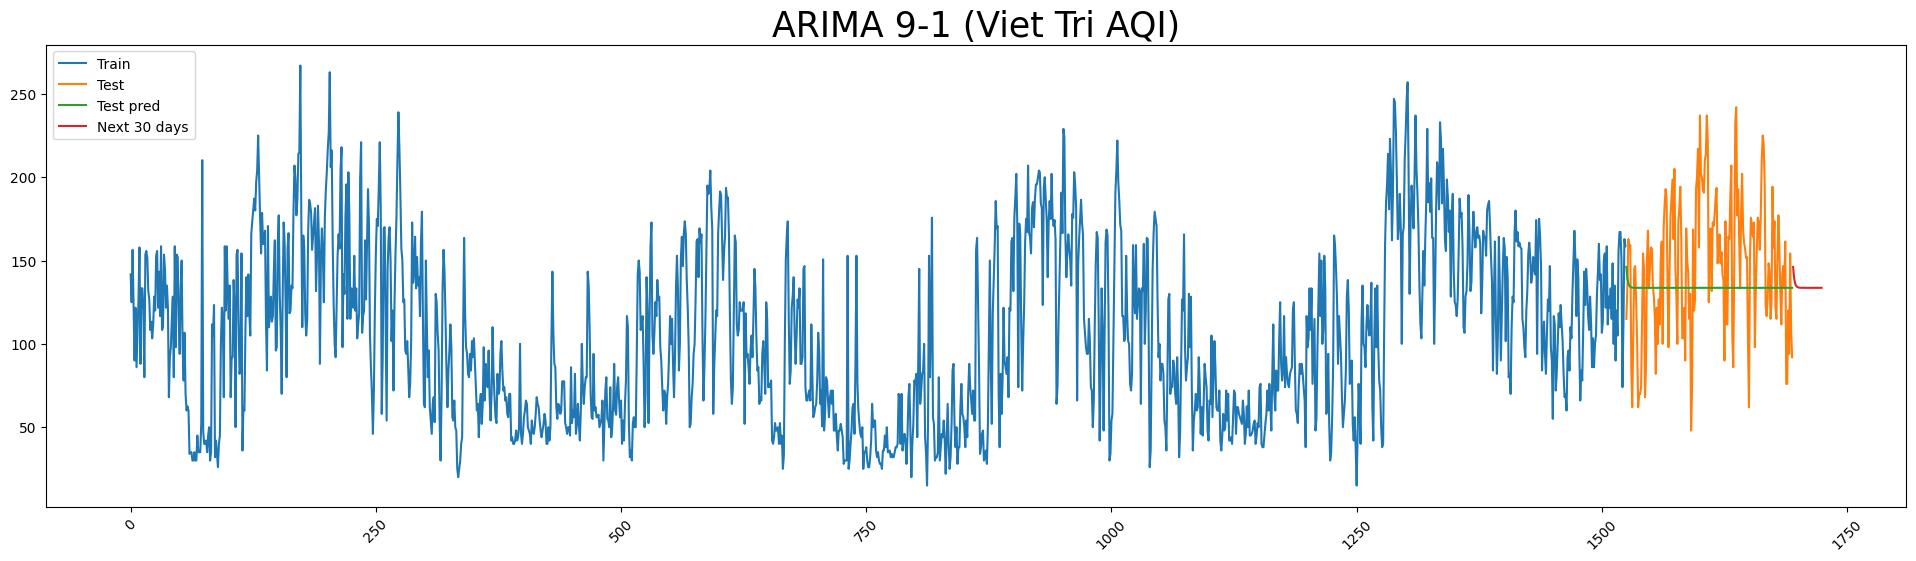

In [47]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
# plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
# plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Test pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Viet Tri AQI)', fontsize=25)

plt.show()